In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [20]:
df = pd.read_csv(r"C:\Users\Maria\OneDrive\Desktop\python project\student_performance.csv")
print(df.head())

   study_hours  sleep_hours  participation  exam_score
0          1.5            6              2          55
1          3.0            7              3          70
2          2.0            5              1          58
3          4.5            8              4          85
4          5.0            7              3          88


In [21]:
# Remove missing rows (if any)
df = df.dropna()

# Select features and target
features_1 = ['study_hours']  # Simple model
features_2 = ['study_hours', 'sleep_hours', 'participation']  # Multi-feature model
X1 = df[features_1]
X2 = df[features_2]
y = df['exam_score']


In [22]:
from sklearn.model_selection import train_test_split

# For simple model
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# For multi-feature model
X_train2, X_test2, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression

# Linear Regression (1 feature)
lin_reg1 = LinearRegression().fit(X_train1, y_train)

# Linear Regression (multiple features)
lin_reg2 = LinearRegression().fit(X_train2, y_train)


In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # You can try degree=3 too
X_train2_poly = poly.fit_transform(X_train2)
X_test2_poly = poly.transform(X_test2)

poly_reg = LinearRegression().fit(X_train2_poly, y_train)


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X, y, name):
    predictions = model.predict(X)
    print(f"\n📊 {name}")
    print("R² Score:", round(r2_score(y, predictions), 2))
    print("MSE:", round(mean_squared_error(y, predictions), 2))

evaluate_model(lin_reg1, X_test1, y_test, "Linear Regression (study_hours)")
evaluate_model(lin_reg2, X_test2, y_test, "Linear Regression (multi-feature)")
evaluate_model(poly_reg, X_test2_poly, y_test, "Polynomial Regression (degree=2)")



📊 Linear Regression (study_hours)
R² Score: 0.58
MSE: 41.53

📊 Linear Regression (multi-feature)
R² Score: 0.63
MSE: 36.68

📊 Polynomial Regression (degree=2)
R² Score: 0.36
MSE: 63.89


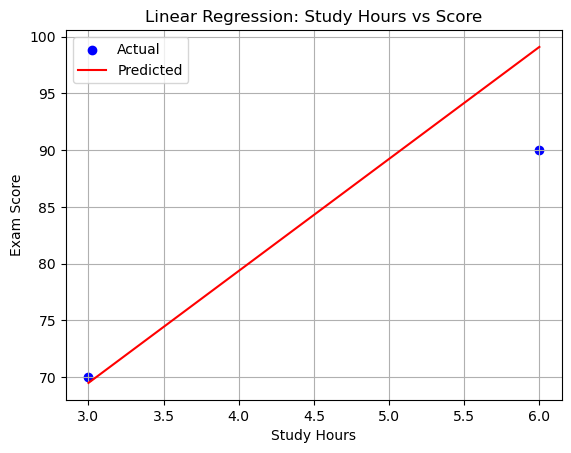

In [26]:
import matplotlib.pyplot as plt

# Visualize simple model
plt.scatter(X_test1, y_test, color='blue', label='Actual')
plt.plot(X_test1, lin_reg1.predict(X_test1), color='red', label='Predicted')
plt.title("Linear Regression: Study Hours vs Score")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True)
plt.show()
